# Generating Images with CDGAM 

## Introduction
Previous projects in this class have focused on making predictions. We have used deep, convoluted, and recurrent neural networks to learn mappings from data points to labels. This type of learning is called discriminative learning, as in, we would like to discriminate between photos of cats and photos of dogs. There are other types of machine learning problems that are not related to solving discriminative tasks. For example, given an unlabeled dataset we might want to learn a representation that captures the characteristics of the data. With this model we could sample synthetic data points that resemble the distribution of the training data. For example, given a large corpus of photographs of faces, we may want to be able to generate a new photorealistic image that looks like it may have come from the same dataset. This type of learning is called generative modeling. In this project we will be generating images of handwritten digits using an adversarial nets framework. 

#### Problem Statement 
The goal of the project is to generate images from scratch (from noise) that are unique and indistinguishable from the handwritten number images in the MNIST dataset of handwritten digits. 

This problem can be reframed in the following way: 
We are interested in generating black and white square images of a handwritten number with a size of n by n pixels. We can reshape each data sample as an n x n dimensional vector (by stacking columns on top of each others) such that each image is be represented by a vector. However, not all vectors will represent a handwritten number once shaped back to a square. 
So, we can say that the N dimensional vectors that effectively reproduce a handwritten number are distributed according to a very specific probability distribution over the entire N dimensional vector space (some points of that space are very likely to represent a handwritten number whereas it is highly unlikely for some others). In the same spirit, there exists, over this N dimensional vector space, probability distributions for images of letters, shoes, cats, birds and so on.
Then, the problem of generating a new image of a handwritten number is equivalent to the problem of generating a new vector following the “a handwritten number probability distribution” over the N dimensional vector space. So we are, in fact, facing a problem of generating a random variable with respect to a specific probability distribution.


#### Related Work

The process of creating new images from an existing dataset is called image synthesis (or generation). The goal of image synthesis is to construct images that are barely distinguishable from target images. Synthesized images can contribute to a number of applications such as the image to image translation, image super-resolution, 3D object modeling, unsupervised domain adaptation, domain transfer, future frame prediction, image inpainting, image editing, and feature recovering of astrophysical images. Until recently, we had no method that could synthesize novel photorealistic images but the success of deep neural networks for discriminative learning opened up new possibilities. 

One big trend over the last three years has been the application of discriminative deep nets to overcome challenges in problems that we don’t generally think of as supervised learning problems. Generative models use unsupervised learning to learn the data distribution of a training data with the goal of generating new samples from the same distribution. It is not always possible to learn the exact distribution of our data so we try to model a distribution which is as similar as possible to the true data distribution. With the rise of deep learning, progress on generative modeling has been made by converting the generation problem to a prediction one and using deep learning algorithms to learn such a problem. The family of methods that combine generative models with deep neural networks is called deep generative models (DGM). The secret to DGMs is that the neural networks we use as generative models have a number of parameters significantly smaller than the amount of data we train them on, so the models are forced to discover and efficiently internalize the essence of the data in order to generate it. As a branch of self-supervised learning techniques in deep learning, DGMs specifically focus on characterizing data generation processes.

For a dataset of samples from a data distribution 𝑞(𝑥), the goal of a DGM is to build deep neural networks with parameters 𝜃, to describe a distribution 𝑝(𝑥) so that the parameters 𝜃 can be trained to ensure 𝑝(𝑥) match 𝑞(𝑥)the best. All DGMs share this same basic setup, but they differ in the ways they approach the problem. There are three popular model types (according to OpenAI taxonomy): Variational Autoencoder (VAE), Generative Adversarial Networks (GANs) and auto-regressive models. Each of these are detailed below:

##### Autoregressive models
Considering that images are composed of many pixels, there are two basic methodologies to alleviate this problem. The more direct approach is to generate each image pixel by pixel. An alternative approach is to exploit the statistical properties of the latent representation space, and generate each image as a whole.

Most of the traditional image generation models analyze images pixel by pixel. However, the quality of the generated images is generally very low and the interdependencies between the pixels cannot be precisely captured. In recent years, the development of deep neural networks offers opportunities to generate images by modeling the interdependencies between the pixels. Autoregressive models such as PixelRNN train a network which models the conditional distribution of every individual pixel given previous pixels (to the left and to the top). This is similar to plugging the pixels of the image into a char-rnn, but the RNNs run both horizontally and vertically over the image instead of just a 1D sequence of characters. Autoregressive models dispense with latent variables and directly model the conditional distribution over pixels. These models produce convincing samples but are costly to sample from and do not provide a latent representation. 
##### Variational AutoEncoders
Variational Autoencoders (VAEs) have emerged as one of the most popular approaches to unsupervised learning of complicated distributions. Unlike Autoregressive models, a VAE generates each image as a whole and needs to explicitly or implicitly estimate the latent distribution of the images. VAEs convert the generative problem to a discriminative one by learning the mapping from the input space itself. For example, we want to learn an identity map that, for each image x, would ideally predict the same image, namely, x = f(x), where f is the predictive model.
From this model we can create a generative model formed of two components: an encoder model q(h|x) that maps the input to another space, which is referred to as hidden or the latent space represented by h, and a decoder model q(x|h) that learns the opposite mapping from the hidden input space.
These components form an end-to-end trainable model where both the encoder and decoder models are neural networks of different architectures to get desired outcomes. As the model is learned, we can remove the decoder from the encoder and use them separately. To generate a new data sample, we generate a sample from the latent space and then feed that to the decoder to create a new sample from the output space.
VAEs are straightforward to train but introduce potentially restrictive assumptions about the approximate posterior distribution

##### Generative adversarial networks 
Generative adversarial networks (GANs) are one the most popular unsupervised algorithms in recent years. Like autoencoders, the general concept is to create networks that will work together in a relationship and learn the latent spaces through learning that allow us to generate new data samples. GAN is a generative network, where we have a generator model q(x|h) to map the small dimensional latent space of h (which is usually represented as noise samples from a simple distribution) to the input space of x. This is quite similar to the role of decoders in autoencoders.
The GAN also has a discriminative model p(y| x), which tries to associate an input instance x to a yes/no binary answer y, about whether the generator model generated the input or was a genuine sample from the dataset we were training on. When these models are coupled, we can train them end to end by assuring that the generator model is getting better over time to fool the discriminator model, while the discriminator model is trained to work on the harder problem of detecting frauds. Finally, we desire a generator model with outputs that are indistinguishable from the real data that we used for the training.
Through the initial parts of the training, the discriminator model can easily detect the samples coming from the actual dataset versus the ones generated synthetically by the generator model, which is just beginning to learn. As the generator gets better at modeling the dataset, we begin to see more and more generated samples that look similar to the dataset. 
Their unsupervised learning process makes them attractive to representation learning. However, one of the crucial problems with GANs is about their unstable training phase, often resulting in generators that create meaningless outputs which are far away from the training data distribution.




# Approach and Model Architecture

For this project we use a Deep Convolutional GAN (DCGAN)to learn a model that can produce images of handwritten digit images that are indistiguisable from the images in the MNIST training dataset. In 2015 Radford et al. [54] proposed the Deep Convolutional GAN (DCGAN), where both the discriminator and generator are deep CNNs. Convolutional GANs are able to make use of the advantages of CNNs in GANs. 

The CDGAN is a generative model that tries to learn the model to generate the input distribution as realistic as possible.  Instead of predicting a label given features, the GAN’s end goal is to predict features given a label. The idea is to sample from a simple distribution like Gaussian and then learn to transform this noise to data distribution using universal convolution neural networks as function approximators. 

In this section we give an overview of the GAN structure and training process. 

## Generative Adversarial Network Architecture
The architecture of Generative Adversarial Networks can be understood as a game between the two players, the Generator and the Discriminator.

1. The Generative model (G): learns to create counterfeit images that are indistinguishable to the training data
2. The Discriminative model (D): tries to to classify whether a given image is real (comes from the training date)  or counterfeit (comes from G) 

The two players in the game are represented by two functions, each of which is differentiable both with respect to its inputs and with respect to its parameters. 

* The discriminator function D(x) takes in input x and using another differentiable function with parameters θ<sub>D</sub> outputs a single scalar value between 0 and 1, indicating the probability that x comes from the true data distribution P<sub>data</sub>(x). 
* The generator function G(z) takes in input z (a noise variable defined a prior) and has maps this to data distribution using a complex differentiable function with θ<sub>G</sub>. 

The generator can only control θ<sub>G</sub> , while the discriminator can only control θ<sub>D</sub> . Typically, a deep neural network is used to represent both the generator and the discriminator. 

We have stated that the problem of generating a new image of a handwritten number can be rephrased into a problem of generating a random vector in the N dimensional vector space that follows the “handwritten number probability distribution” and we have suggested to use a transform method, with a neural network to model the transform function. Mathematically, we think about the training dataset as samples from a true data distribution p<sub>data</sub>(x). Our model also describes a distribution p<sub>model</sub>(x) that is defined implicitly by taking points from a unit Gaussian distribution and mapping them through a (deterministic) neural network — our generative model. 
Our network is a function with parameters θ, and tweaking these parameters will tweak the generated distribution of images. Our goal then is to find parameters θ that produce a distribution that closely matches the true data distribution (for example, by having a small KL divergence loss). Therefore, you can imagine the model distribution starting out random and then the training process iteratively changing the parameters θ to stretch and squeeze it to better match the data distribution.

Now that weve discussed the structure of the GAN, we need to train (optimise) the network to express the right transform function.


## Generative Adversarial Network Training
When training discriminative models in previous projects we have used a direct training method. This involves, at each step, comparing the true values to the generated values and backpropagating the difference (the error) through the network. For GANs, it's very difficulty to directly compare two probability distributions based on samples so we need to take an indirect approach to training.  
The indirect training method does not directly compare the true and generated distributions. Instead, we train the generative network by making these two distributions go through a downstream task chosen such that the optimisation process of the generative network with respect to the downstream task forces the generated distribution to get closer and closer to the true distribution. The downstream task of GANs is a discrimination task between true and generated samples (or a “non-discrimination” task as we want the discrimination to fail as much as possible. 

Say we have a known true distribution and we want a generator that samples from this probability distribution. The “direct” training method would iteratively adjust the generator (using gradient descent) to correct the measured difference between the true and generated distributions. For the “indirect” approach, we also have to consider a discriminator. 
Assuming that the discriminator can correctly predict a class (“true” or “generated”) for any given point, when the two distributions are far apart, the discriminator will be able to classify easily and with a high level of confidence. When the two distributions are equal, it will have the most difficulty predicting the class. For each point theres an equal chances for it to be “true” or “generated” so the discriminator can’t do better than being true in one case out of two in average.

### Loss Functions 
Neural networks modelling requires us to define two things: an architecture and a loss function. We have already described the architecture of Generative Adversarial Networks, now we discuss their loss function.

Each player's cost function is defined in terms of both players’ parameters. While each player’s cost depends on the other player’s parameters, they cannot control the other player’s parameters. 

* We denote the discriminator’s cost function as L<sub>D</sub>(θ<sub>D</sub> , θ<sub>G</sub>) . 
* We denote the generator’s cost function as L<sub>G</sub>( θ<sub>D</sub> , θ<sub>G</sub>).

We have shown that the two networks have very different goals– they can be viewed as adversaries. To succeed in the game, the generator is trained to fool the discriminator and the generator must generate samples that are indistinguishable to the discriminator. Since the discriminator and generator have different goals, they also have different cost functions they wish to optimize. 
The solution to the game is is slightly different from the optimization problems, where we minimize one cost function L by finding its local minimum. Instead of treating this as an optimization problem, we treat this as a game between two players. A solution is found once the GANs reach a Nash Equilibrium at which each player cannot reduce their cost without changing the other players’ parameters.

* The discriminator wishes to minimize L<sub>D</sub> , but can only do so by changing θ<sub>D</sub> 
* The generator wishes to minimize L<sub>G</sub> , but can only do so by changing θ<sub>G</sub> 

For GANs, a Nash equilibrium is a tuple, (θ<sub>D</sub>, θ<sub>G</sub>) that is: 

* A local minimum of L<sub>D</sub> with respect to θ<sub>D</sub>
* A local minimum of L<sub>G</sub>  with respect to θ<sub>G</sub>. 

If G(z) and D(x) have sufficient capacity (e.g., if they are neural networks), then the Nash equilibrium corresponds to: 

* The generator draws samples from p(x), i.e., the distribution of the data. 
* The discriminator cannot discriminate between them, i.e., D(x) = 1/2 for all x.

In this case, the generator is a perfect generative model, sampling from p(x).

Since the goal of the generator is to fool the discriminator, it is trained to maximise the final classification error (between true and generated data)
Since the goal of the discriminator is to detect fake generated data, it is trained to minimise the final classification error

### Discriminator Loss 
The discriminator connects two loss functions. During training, the discriminator ignores the generator loss and just uses the discriminator loss.

If we send the discriminator “true” and “generated” data in the same proportions, the discriminator’s cost is:
L<sub>D</sub> (θ<sub>D</sub> , θ<sub>G</sub> ) = − 1/2 E<sub>x∼pdata</sub> log D(x) − 1/2 E<sub>xˆ∼pmodel</sub> log(1 − D(xˆ))
= − 1/2 E<sub>x∼pdata</sub> log D(x) − 1/ 2 Ez log(1 − D(G(z)))

This cost is fairly intuitive: 
The loss will be zero if D(x) = 1 for all x ~ p<sub>data</sub> and D(xˆ) = 0 for all xˆ ~ p<sub>model</sub>, i.e., generated via xˆ = G(z). 

This is the same as the cross-entropy loss for a neural network doing binary classification with a sigmoid output. As the discriminator learns, the estimator will make changes to θ<sub>D</sub> to optimize this quantity. 

### Discriminator Training
The goal of the discriminator is to minimize the loss functioning (L<sub>D</sub>). To minimize the loss we differentiate with respect to D(x) and set the derivative to zero. 
A solution occurs at: 

D(x)= p<sub>data</sub>(x)/p<sub>model</sub>(x) + p<sub>data</sub>(x)

The optimal discriminator strategy to:

* Accept an input, x.
* Evaluate its probability under the distribution of the data, p<sub>data</sub>(x). The discriminator doesn’t have access to p<sub>data</sub>(x), but learns it through the training process. 
* Evaluate its probability under the generator’s distribution of the data, p<sub>model</sub>(x). The same note applies: it doesn’t have access to p<sub>model</sub>(x) but learns it through the training process.

If the discriminator has high enough capacity, it can reach its optimum. If the generator has high enough capacity, it will then move to set: p<sub>model</sub>(x) = p<sub>data</sub>(x) for all x. This results in the output D(x) = 1/2. This is the Nash equilibrium.

In GANs, the fact that the discriminator learns an approximation of the ratio p<sub>data</sub>(x) / p<sub>model</sub>(x) is the key insight that allows it to work and makes it distinctly different from other generative models that learn p<sub>model</sub>(x) directly (or indirectly via latent variable models). Because the discriminator learns this, we can now judge how good samples from the generator are. By training D to be an effective discriminator, we can stack G and D to form our GAN, freeze the weights in the discriminator, and train the generative network weights to push random noisy inputs towards the “real” example class output of the adversarial half.

### Using the Discriminator to Train the Generator

The loss function comes from the discriminator and not the generator. Part of the indirect training process means that the generator is not trained to minimize the distance to a specific image, but just to fool the discriminator. This enables the model to learn in an unsupervised manner. The generator feeds samples into the discriminator, and the discriminator produces a loss function. The generator loss penalizes the generator for producing a sample that the discriminator network classifies as fake.

The generator does however update through backpropagation. The Generator takes random noise as input and samples the output in order to fool the Discriminator that it’s the real image. Once the Generator’s output goes through the Discriminator, we know the Discriminator’s verdict whether it thinks that it was a real image or a fake one. We can use this information to feed the Generator and perform backpropagation again. If the Discriminator identifies the Generator’s output as real, it means that the Generator did a good job and it should be rewarded. On the other hand, if the Discriminator recognized that it was given a fake, it means that the Generator failed and it should be punished with negative feedback. Backpropagation adjusts each weight in the right direction by calculating the weight's impact on the output but the impact of a generator weight depends on the impact of the discriminator weights it feeds into. So backpropagation starts at the output and flows back through the discriminator into the generator.

**Note!** we don't want the discriminator to change during generator training. Trying to hit a moving target would make a hard problem even harder for the generator.

So we train the generator with the following procedure:

* Sample random noise.
* Produce generator output from sampled random noise.
* Get discriminator "Real" or "Fake" classification for generator output.
* Calculate loss from discriminator classification.
* Backpropagate through both the discriminator and generator to obtain gradients.
* Use gradients to change only the generator weights.
This is one iteration of generator training. 

Next we combine the training of both the training and the discriminator.

### Complete GAN Objective Function

Since two player’s goals are in opposition with one another, the game can be analyzed as a Zero-sum game where the sum of the generator’s loss and the discriminator’s loss is always zero. 
In a zero-sum game, the generator’s loss is:
L<sub>G</sub>=-L<sub>D</sub> 

The solution for a zero-sum game is called a minimax solution, where the goal is to minimize the maximum loss. Since the game is zero-sum, we can summarize the entire game by stating that the loss function is L<sub>G</sub>(the discriminator’s payoff), so that the minimax objective is:
min<sub>G</sub> max<sub>D</sub> {1/2E<sub>x-pdata</sub> logD(x) + 1/2 Ezlog(1-D(G(z))) }

The objective equation can be split into two logical functions, each with its own purpose, benefiting either G (Player 1) or D (Player 2).

**Player 1:** The generator wants to minimize the objective (its loss) so that D(G(z)) is close to 1 (discriminator is fooled into thinking that the generated G(z) is real).We modify θ<sub>G</sub> to *minimize* the minimax objective using gradient *descent* on the generator. 
 θ<sub>G</sub> ← arg min θ<sub>G</sub> { 1/2 Ez log(1 − D(G(z)))]

**Player 2:** The discriminator wants to maximize the objective (its payoff) such that D(x) is close to 1 (real) and D(G(z)) is close to zero (fake). We modify θ<sub>D</sub> to *maximize* the minmax objective using gradient *ascent* for the discriminator.  θ<sub>D</sub> ← arg max  θ<sub>D</sub> { 1/2 E<sub>x-pdata</sub> log D(x) + 1/2 Ez log(1 − D(G(z)))] 

The game reaches nash equilibrium where the generator produces data from the exact targeted distribution and where the discriminator predicts “true” with probability 1/2 for any point it receives. 

#### Generator Cost Function modification
While in theory, applying the above objective function to G should improve its abilities to produce fake images, the reality is that the gradients, which G learns from, are rather flat. At the start of the game when the generator hasn’t learned anything, the gradient is usually very small and when it is doing very well, the gradients are very high. But we want the opposite behaviour. Therefore, if D(G(z)) ≈ 0, as may happen early on in training when the discriminator can tell the difference between real and synthetic examples, the gradient is close to zero. This results in little learning for  θ<sub>G</sub>, and so in practice the generator cost function min θ<sub>G</sub> ( 1/2 Ez log(1 − D(G(z)))) is rarely used

To combat this,  we opt for a cost function that has a large gradient when D(G(z)) ≈ 0, so that the generator is encouraged to learn much more early in training. 
We change the Objective function for G to: max θ<sub>G</sub> (log(D(G(z)))

With this new cost function we are maximizing the likelihood for D to guess incorrectly, as opposed to minimizing the likelihood of D being correct. This still achieves the same overall goal of being minimized when D(G(z)) = 1, but now the gradient encourages far more learning when the generator performs poorly.

*Note that by changing the cost function for the generator network, the game is no longer zero-sum. This is a heuristic change made to the game to solve the practical problem of saturating gradients when the generator isn’t doing well*


### Complete GAN Training
Both the discriminator and generator are trained simultaneously in a minimax game. The discriminator tries to reduce the discriminative loss and Generator tries to oppose it by trying to increase the error. 

The training process consists of simultaneous application of Stochastic Gradient Descent on Discriminator and Generator.

On each step, two minibatches are sampled: a minibatch of x values from the dataset and a minibatch of z values drawn from the model’s prior over latent variables. 
Then two gradient steps are made simultaneously: one updating θ<sub>D</sub> to reduce L<sub>D</sub> and one updating θ<sub>G</sub> to reduce L<sub>G</sub>. 
While training, we alternate between k steps of optimizing D and one step of optimizing G on the mini-batch. The process of training stops when the Discriminator is unable to distinguish <sub>pmodel</sub> and <sub>pdata</sub> i.e. D(x, θ<sub>D</sub>) = ½ or when <sub>pmodel</sub> = <sub>pdata</sub>.

GAN training follows the following steps. For some number of training iterations, 

* Take k gradient steps for the discriminator, each doing the following: 
    * Sample m noise samples, {z1 , z 2 , . . . , zm} from a noise prior, p(z).
    * Sample m actual samples, {x1 , x2 , . . . , xm} from pdata(x). (this is a minibatch of your input data.) 
    * Perform a SGD step (e.g., with Adam): θD ← θD + ε∇θD 1m( log( D(xi) ) + log(1 − D(G(zi )))
* Do a gradient descent step for the generator:  
    * Sample a minibatch of m noise samples, {z1 , z2 , . . . , zm} from a noise prior, p(z).
    * Perform a SGD step: θG  ← θG − ε∇θG 1m log(1 − D(G(zi )))


At each iteration of the training process, the weights of the generative network are updated in order to increase the classification error (error gradient *ascent* over the generator’s parameters) whereas the weights of the discriminative network are updated so that to decrease this error (error gradient *descent* over the discriminator’s parameters).  The competition between them makes these two networks “progress” with respect to their respective goals.



## Modeling
In 2015 Radford et al. proposed the first GAN to make use of the advantages of CNNs in GAN. This network is called the Deep Convolutional GAN (DCGAN). Convolutional neural networks (CNNs) are well suited to solving image related problems, requiring fewer parameters than a normal feed-forward neural network and therefore being much faster to train. 

In our project, we are going to use the architecture developed by Radford et al., 2015. Their approach uses a convolutional networks in both the generator and discriminator which replace pooling with strided convolutions, allowing down-sampling and up-sampling to be learned during training. They also apply batch normalisation everywhere (except for the generator output layer and discriminator input layer) which stabilises training. 

### Dataset: MNIST Dataset of Handwritten Digits
The MNIST handwritten digit dataset is a standard image dataset used in the field of computer vision. Using a small and well-understood dataset means that smaller models can be developed and trained quickly, allowing the focus to be put on the model architecture and image generation process itself. 
MNIST is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 70,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

We will use the images in the training dataset as the basis for training a Generative Adversarial Network.
Specifically, the generator model will learn how to generate new plausible handwritten digits between 0 and 9, using a discriminator that will try to distinguish between real images from the MNIST training dataset and new images output by the generator model.
This is a relatively simple problem that does not require a sophisticated generator or discriminator model, although it does require the generation of a grayscale output image.

We begin by loading the dataset and printing its shape. We can see that there are 60K examples in the training set and 10K in the test set and that each image is a square of 28 by 28 pixels.

In [1]:
from keras.datasets.mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Using TensorFlow backend.


Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)



The images are grayscale with a black background (0 pixel value) and the handwritten digits in white (pixel values near 255). This means when plotted, they are mostly black with a white digit in the middle. We change the color map so that the background is white and plot the first 25 images from the training dataset in a 5 by 5 square.


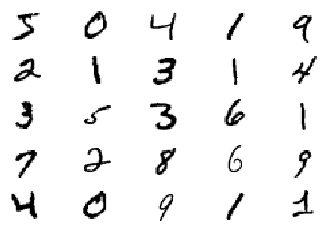

In [5]:
# example of loading the mnist dataset
from keras.datasets.mnist import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

### Discriminator Model
The discriminator is a neural network we are fairly familiar with, a CNN-based image classifier. The role of the discriminator is to take a sample image from our dataset as input and output a classification prediction as to whether the sample is real or fake. This is a binary classifier labeling images as real or fake. However, instead of classifying an image in the correct class, we focus on learning the distribution of the class (let’s say producing building images). Therefore, since the desired class is known, we want the classifier to quantify how representative the class is to the real class distribution. That’s why discriminators output a single probability, wherein 0 corresponds to the fake generated images and 1 to the real samples from our distribution.

In order to reduce the number of parameters per layer, as well as to make training faster and more stable our architecture follows the following principles:

1. Replace any pooling layers with strided convolutions. This can be justified because pooling is a fixed operation. In contrast, strided convolution can also be viewed as learning the pooling operation, which increases the model’s expressiveness ability. The disadvantage is that it also increases the number of trainable parameters.
2. Use batch normalization. Batch normalization stabilizes training and enables training with higher learning rate, based on the statistics of each batch in the layer.
3. Remove fully connected hidden layers for deeper architectures to reduce the number of training parameters and training time.
4. Use LeakyReLU activation for all layers. Both activation functions are nonlinear and enable the model to learn more complex representations.
5. A dropout between 0.4 and 0.7 between layers prevent over fitting and memorization.


Since the output of the Discriminator is sigmoid, we use binary cross entropy for the loss. We will use Adam optimizer as it is computationally efficient and has very little memory requirement. Adam is a combination of Adagrad and RMSprop. We set our learning rate to 0.0002 and our momentum to 0.5. Weight decay and clip value stabilize learning during the latter part of the training. We will have to adjust the decay if we adjust the learning rate.

In [6]:
# example of defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
___________________________________________________________

### Discriminator Training 

The discriminator in a GAN trains on images from the training data and images generated from the generator model. We don't have a generator model yet so we are just going to train a couple training examples with a class label of one, and randomly generated samples with a class label of zero. This isnt a necessary step but the development of these elements will be useful later, and it helps to see that the discriminator is just a normal neural network model for binary classification.
Since we don’t have a generator model,we generate images comprised of random pixel values, specifically random pixel values in the range [0,1] like our scaled real images. We use the generate_fake_samples() function to generates images of random pixel values and their associated class label of 0, for fake.

Before we train our model we prepare out data. 

1. We update the images to have an additional dimension for the grayscale channel: convolutional neural networks expect 3D arrays of images as input, where each image has one or more channels
2. We scale the pixel values from the range of unsigned integers in [0,255] to the normalized range of [0,1].

The discriminator learns using traditional supervised learning techniques, dividing inputs into two classes (real or fake) and using backpropogation to allow the Discriminatior to learn over time and get better at distinguishing images.  If the Discriminator correctly classifies fakes as fakes and reals as reals, we reward it with positive feedback in the form of a loss gradient. If it fails at its job, it gets negative feedback. This mechanism allows it to learn and get better.
The model will be updated in batches, specifically with a collection of real samples and a collection of generated samples. We are using a batch size of 256 images where 128 are real and 128 are fake each iteration. We do not specify the epochs for now and fit the discriminator model for a fixed number of batches. The model will learn to discriminate between real and fake (randomly generated) images rapidly, therefore, not many batches will be required before it learns to discriminate perfectly.

Trainong our discriminator model involves repeatedly retrieving samples of real images and samples of generated images and updating the model for a fixed number of iterations. We update the discriminator separately for real and fake examples so that we can calculate the accuracy of the model on each sample prior to the update. This gives insight into how the discriminator model is performing over time.


In [7]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
 
# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X
 
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y
 
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(28 * 28 * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 28, 28, 1))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y
 
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
 
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=38% fake=36%
>2 real=46% fake=59%
>3 real=45% fake=71%
>4 real=47% fake=84%
>5 real=53% fake=94%
>6 real=47% fake=97%
>7 real=44% fake=99%
>8 real=48% fake=100%
>9 real=48% fake=100%
>10 real=50% fake=100%
>11 real=48% fake=100%
>12 real=54% fake=100%
>13 real=52% fake=100%
>14 real=52% fake=100%
>15 real=49% fake=100%
>16 real=54% fake=100%
>17 real=64% fake=100%
>18 real=59% fake=100%
>19 real=55% fake=100%
>20 real=58% fake=100%
>21 real=73% fake=100%
>22 real=68% fake=100%
>23 real=76% fake=100%
>24 real=80% fake=100%
>25 real=80% fake=100%
>26 real=89% fake=100%
>27 real=91% fake=100%
>28 real=91% fake=100%
>29 real=93% fake=100%
>30 real=95% fake=100%
>31 real=97% fake=100%
>32 real=98% fake=100%
>33 real=98% fake=100%
>34 real=96% fake=100%
>35 real=97% fake=100%
>36 real=100% fake=100%
>37 real=99% fake=100%
>38 real=98% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=99% fake=100%
>44 real=100% fake=100

The discriminator model learns to tell the difference between real and randomly generated MNIST images very quickly, in about 40 batches! Next we build our generator model. 

## Generator Model

The generator model is responsible for creating new, fake but plausible images of handwritten digits. It does this by taking as input a point from the latent space as input and outputting a square grayscale image. The latent space is an arbitrarily defined vector space of Gaussian-distributed values. It has no meaning, but by drawing points from this space randomly and providing them to the generator model during training, the generator assigns meaning to those latent points until, at the end of training, the latent vector space represents a compressed representation of MNIST images. We use as our latent space, a 100 element vector of Gaussian random numbers. We don’t have to use a 100 element vector as input; it is a round number and widely used, but 10, 50, or 500 would probably work just as well. 

The Generator has almost the same architecture as the discriminator, but reflected. While a standard convolutional classifier takes an image and downsamples it to produce a probability, the generator takes a vector of random noise and upsamples it to an image. The first throws away data through downsampling techniques like maxpooling, and the second generates new data. 

Developing a generator model requires that we transform a vector from the latent space with, 100 dimensions to a 2D array with 28×28 or 784 values. There are a number of ways to achieve this but there is one approach that has proven effective at deep convolutional generative adversarial networks. 
It involves two main elements:

1. A Dense layer as the first hidden layer that has enough nodes to represent a low-resolution version of the output image. An image half the size (one quarter the area) of the output image would be 14×14, and an image one quarter the size (one eighth the area) would be 7×7.

2. Deconvolution: Upsampling the low-resolution image to a higher resolution version of the image. We use a layer called Conv2DTranspose, a combination of a reverse pooling layer and a normal Conv2D layer. 



In order to reduce the number of parameters per layer, as well as to make training faster and more stable our architecture follows the following principles:
 
1. Use transpose convolutions. Because sampled noise is a 1D vector, it is usually projected and reshaped to a small 2D grid (i.e. 4x4), with an enormous amount of feature maps. We use transpose convolutions to increase spatial dimensions (usually doubles them) and reduces the number of feature maps.
2. Use batch normalization. Batch normalization stabilizes training and enables training with higher learning rate, based on the statistics of each batch in the layer.
3. Remove fully connected hidden layers for deeper architectures to reduce the number of training parameters and training time.
4. Use ReLU activation in for all layers except for the output, which produces values in the image range [-1,1]
5. We use the LeakyReLU with a default slope of 0.2, reported as a best practice when training GAN models.
6. The output layer of the model is a Conv2D with one filter and a kernel size of 7×7 and ‘same’ padding, designed to create a single feature map and preserve its dimensions at 28×28 pixels. A sigmoid activation is used to ensure output values are in the desired range of [0,1].
7. The first hidden layer has enough nodes (6,272) for multiple versions of the output image (128 feature maps). We don’t just want one version of the image; we want many parallel interpretations of the input. We want the same thing in reverse: many parallel versions of our output with different learned features that can be collapsed in the output layer into a final image. 
8. The feature maps are upscaled via the two Conv2DTranspose layers to the desired output shape of 28×28, until the output layer, where a single activation map is output.
9. The Conv2DTranspose layers are configured with a stride of (2×2). This quadruples the area of the input feature maps. 
10. The Conv2DTranspose layers use a kernel size that is a factor of the stride (e.g. double) to avoid a checkerboard pattern that can be observed when upsampling.

Note: the generator model is not compiled and does not specify a loss function or optimization algorithm. This is because, as we discussed in the Approach section, the generator is not trained directly. 


In [8]:

# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
 
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model
 
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 28, 28, 128)       0         
__________

### Training the Generator

This model cannot do much at the moment but we can demonstrate how to use it to generate samples. This is unnecessary but since it's our first time building a generator we want to see that it works.

We start by generating new points in the latent space that we can use as input to the model. We use the randn() NumPy function to generate arrays of random numbers drawn from a standard Gaussian. The array of random numbers can then be reshaped into samples, that is n rows with 100 elements per row. 

We update the generate_fake_samples() function to take the generator model as an argument and use it to generate the desired number of samples by first calling the generate_latent_points() function to generate the required number of points in latent space as input to the model. The updated generate_fake_samples() function returns both the generated samples and the associated class labels.

Finally, we plot the generated samples. Running the example generates 25 examples of fake MNIST images and visualizes them on a single plot of 5 by 5 images.

The MNIST images we generate in this section is with an untrained generator model and it shows. Our generated images look like completely random greyscale pixel values.

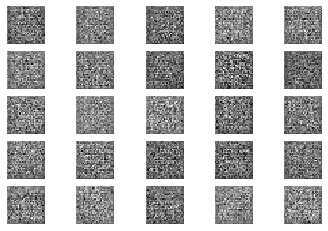

In [9]:
# example of defining and using the generator model
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot
 
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y
 
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
pyplot.show()

## Creating our DCGAN

We define a new GAN model that stacks the generator and discriminator such that the generator receives as input random points in the latent space and generates samples that are fed into the discriminator model directly, classified, and the output of this larger model can be used to update the model weights of the generator. Using the functional API, we can simply re-use the same network objects we have already instantiated and they will maintain the same shared weights with the previously compiled models. 
The generator model is only concerned with the discriminator’s performance on fake examples. Therefore, we will mark all of the layers in the discriminator as not trainable when it is part of the GAN model so that they can not be updated and overtrained on fake examples.We now have a randomly initialized generator, a (poorly) trained discriminator, and a GAN which can be trained across the stacked model of both networks.  


The GAN model uses the same binary cross entropy loss function as the discriminator and the efficient Adam version of stochastic gradient descent with the learning rate of 0.0002 and momentum 0.5, recommended when training deep convolutional GANs.

We will input the noised image of shape 100 units to the Generator. The output generated from the Generator will be fed to the Discriminator.


In [10]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
 
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model
 
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 28, 28, 1)         1164289   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 40705     
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


In [11]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

We almost have everything we need to develop a GAN for the MNIST handwritten digits dataset.

One remaining aspect is the evaluation of the model.

How to Evaluate GAN Model Performance
Generally, there are no objective ways to evaluate the performance of a GAN model.

We cannot calculate this objective error score for generated images. It might be possible in the case of MNIST images because the images are so well constrained, but in general, it is not possible (yet).

Instead, images must be subjectively evaluated for quality by a human operator. This means that we cannot know when to stop training without looking at examples of generated images. In turn, the adversarial nature of the training process means that the generator is changing after every batch, meaning that once “good enough” images can be generated, the subjective quality of the images may then begin to vary, improve, or even degrade with subsequent updates.

There are three ways to handle this complex training situation.

Periodically evaluate the classification accuracy of the discriminator on real and fake images.
Periodically generate many images and save them to file for subjective review.
Periodically save the generator model.
All three of these actions can be performed at the same time for a given training epoch, such as every five or 10 training epochs. The result will be a saved generator model for which we have a way of subjectively assessing the quality of its output and objectively knowing how well the discriminator was fooled at the time the model was saved.

Training the GAN over many epochs, such as hundreds or thousands of epochs, will result in many snapshots of the model that can be inspected and from which specific outputs and models can be cherry-picked for later use.

First, we can define a function called summarize_performance() function that will summarize the performance of the discriminator model. It does this by retrieving a sample of real MNIST images, as well as generating the same number of fake MNIST images with the generator model, then evaluating the classification accuracy of the discriminator model on each sample and reporting these scores.

In [12]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

This function can be called from the train() function based on the current epoch number, such as every 10 epochs.

In [16]:

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [17]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)


### Training GAN 

The training parameters for our GAN are the same as in the Discriminator model except for a reduced learning rate and corresponding weight decay.

We then loop through a number of epochs to train our Discriminator by first selecting a random batch of images from our true dataset, generating a set of images from our Generator, feeding both set of images into our Discriminator, and finally setting the loss parameters for both the real and fake images, as well as the combined loss.
And within the same loop we train our Generator, by setting the input noise and ultimately training the Generator to have the Discriminator label its samples as valid by specifying the gradient loss.

Additionally, in order for us to keep track of our training process, we print the progress and save the sample image output depending on the epoch interval specified.
As you may have noticed, when the specific sample_interval is hit, we call the sample_image function. Which looks as follows


Training the GAN on the MNIST handwritten digit dataset will proceed as follows: 
We will use the images in the training dataset as the basis for training a Generative Adversarial Network. 
* The generator model creates images of handwritten digits by taking a point from the latent space as input and outputting a square grayscale image. The latent space is an arbitrarily defined vector space of Gaussian distributed values. By drawing points from this space randomly and providing them to the generator model during training, the generator model will assign meaning to the latent points until, at the end of training, the latent vector space represents a compressed representation of MNIST images.
* Once the generator model learns how to generate new plausible handwritten digits between 0 and 9, the discriminator tries to distinguish between real images from the MNIST training dataset and new images output by the generator model. * We train the discriminator model by repeatedly retrieving samples of real images and samples of generated images and updating the model for a fixed number of iterations. We update the discriminator separately for real and fake examples so that we can calculate the accuracy of the model on each sample prior to the update. This gives insight into how the discriminator model is performing over time	
* Once the discriminator finishes training, we use backpropogation and the discriminators performance to update the weights in the generator model


Unlike the general tasks like classification, detection etc. the loss doesn’t constantly decrease since there are two opposing parties involved. Also we don’t want either discriminator to overpower generator from the start or vice-versa since in that case it will be a one-sided game and the two networks on a whole wouldn’t be learning as there is no competition, so we start from a stage where both are equally dumb i.e think of generator as generating random images and discriminator as randomly classifying images as fake or real. The networks slowly improve by competing with each other until it reaches a stage where the generator completely fools the discriminator.

In [18]:

# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
 
# define the standalone discriminator model
#def define_discriminator(in_shape=(28,28,1)):
#	model = Sequential()
#	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
#	model.add(LeakyReLU(alpha=0.2))
#	model.add(Dropout(0.4))
#	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
#	model.add(LeakyReLU(alpha=0.2))
#	model.add(Dropout(0.4))
#	model.add(Flatten())
#	model.add(Dense(1, activation='sigmoid'))
#	# compile model
#	opt = Adam(lr=0.0002, beta_1=0.5)
#	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#	return model
 
# define the standalone generator model
#def define_generator(latent_dim):
#	model = Sequential()
#	# foundation for 7x7 image
#	n_nodes = 128 * 7 * 7
#	model.add(Dense(n_nodes, input_dim=latent_dim))
#	model.add(LeakyReLU(alpha=0.2))
#	model.add(Reshape((7, 7, 128)))
#	# upsample to 14x14
#	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#	model.add(LeakyReLU(alpha=0.2))
#	# upsample to 28x28
#	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
#	model.add(LeakyReLU(alpha=0.2))
#	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
#	return model
 
# define the combined generator and discriminator model, for updating the generator
#def define_gan(g_model, d_model):
#	# make weights in the discriminator not trainable
#	d_model.trainable = False
#	# connect them
#	model = Sequential()
#	# add generator
#	model.add(g_model)
#	# add the discriminator
#	model.add(d_model)
#	# compile model
#	opt = Adam(lr=0.0002, beta_1=0.5)
#	model.compile(loss='binary_crossentropy', optimizer=opt)
#	return model
 
# load and prepare mnist training images
#def load_real_samples():
#	# load mnist dataset
##	(trainX, _), (_, _) = load_data()
#	# expand to 3d, e.g. add channels dimension
#	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
#	X = X.astype('float32')
	# scale from [0,255] to [0,1]
#	X = X / 255.0
#	return X
 
# select real samples
#def generate_real_samples(dataset, n_samples):
#	# choose random instances
#	ix = randint(0, dataset.shape[0], n_samples)
#	# retrieve selected images
#	X = dataset[ix]
#	# generate 'real' class labels (1)
#	y = ones((n_samples, 1))
#	return X, y
 
# generate points in latent space as input for the generator
#def generate_latent_points(latent_dim, n_samples):
#	# generate points in the latent space
#	x_input = randn(latent_dim * n_samples)
#	# reshape into a batch of inputs for the network
#	x_input = x_input.reshape(n_samples, latent_dim)
#	return x_input
 
# use the generator to generate n fake examples, with class labels
#def generate_fake_samples(g_model, latent_dim, n_samples):
#	# generate points in latent space
#	x_input = generate_latent_points(latent_dim, n_samples)
#	# predict outputs
#	X = g_model.predict(x_input)
#	# create 'fake' class labels (0)
#	y = zeros((n_samples, 1))
#	return X, y
 
# create and save a plot of generated images (reversed grayscale)
#def save_plot(examples, epoch, n=10):
#	# plot images
#	for i in range(n * n):
#		# define subplot
#		pyplot.subplot(n, n, 1 + i)
#		# turn off axis
#		pyplot.axis('off')
#		# plot raw pixel data
#		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
#	# save plot to file
#	filename = 'generated_plot_e%03d.png' % (epoch+1)
#	pyplot.savefig(filename)
#	pyplot.close()
 
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
#	# prepare real samples
#	X_real, y_real = generate_real_samples(dataset, n_samples)
#	# evaluate discriminator on real examples
#	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
#	# prepare fake examples
#	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
#	# evaluate discriminator on fake examples
#	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
#	# summarize discriminator performance
#	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
#	# save plot
#	save_plot(x_fake, epoch)
	# save the generator model tile file
#	filename = 'generator_model_%03d.h5' % (epoch + 1)
#	g_model.save(filename)
 
# train the generator and discriminator
#def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
#	bat_per_epo = int(dataset.shape[0] / n_batch)
#	half_batch = int(n_batch / 2)
	# manually enumerate epochs
#	for i in range(n_epochs):
		# enumerate batches over the training set
#		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
#			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
#			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
#			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
#			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
#			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
#			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
#			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
#			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
#		if (i+1) % 10 == 0:
#			summarize_performance(i, g_model, d_model, dataset, latent_dim)
 
# size of the latent space
#latent_dim = 100
# create the discriminator
#d_model = define_discriminator()
# create the generator
#g_model = define_generator(latent_dim)
# create the gan
#gan_model = define_gan(g_model, d_model)
# load image data
#dataset = load_real_samples()
# train model
#train(g_model, d_model, gan_model, dataset, latent_dim)

/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 1/234, d=0.684, g=0.714


/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 2/234, d=0.686, g=0.731
>1, 3/234, d=0.673, g=0.751
>1, 4/234, d=0.667, g=0.770
>1, 5/234, d=0.657, g=0.785
>1, 6/234, d=0.651, g=0.806
>1, 7/234, d=0.644, g=0.824
>1, 8/234, d=0.633, g=0.836
>1, 9/234, d=0.629, g=0.850
>1, 10/234, d=0.629, g=0.853
>1, 11/234, d=0.624, g=0.848
>1, 12/234, d=0.626, g=0.829
>1, 13/234, d=0.630, g=0.804
>1, 14/234, d=0.633, g=0.778
>1, 15/234, d=0.634, g=0.755
>1, 16/234, d=0.637, g=0.735
>1, 17/234, d=0.636, g=0.721
>1, 18/234, d=0.629, g=0.713
>1, 19/234, d=0.622, g=0.708
>1, 20/234, d=0.617, g=0.705
>1, 21/234, d=0.607, g=0.703
>1, 22/234, d=0.601, g=0.703
>1, 23/234, d=0.589, g=0.703
>1, 24/234, d=0.581, g=0.703
>1, 25/234, d=0.571, g=0.703
>1, 26/234, d=0.561, g=0.703
>1, 27/234, d=0.555, g=0.704
>1, 28/234, d=0.539, g=0.704
>1, 29/234, d=0.528, g=0.704
>1, 30/234, d=0.519, g=0.705
>1, 31/234, d=0.503, g=0.706
>1, 32/234, d=0.501, g=0.706
>1, 33/234, d=0.489, g=0.707
>1, 34/234, d=0.477, g=0.708
>1, 35/234, d=0.475, g=0.709
>1, 36/234, d=0.459, g

KeyboardInterrupt: 

The model performance is reported every batch, including the loss of both the discriminative (d) and generative (g) models. The chosen configuration results in the stable training of both the generative and discriminative model.
The generator is evaluated every 20 epochs, resulting in 10 evaluations, 10 plots of generated images, and 10 saved models.

I would expect the following things to happen, based on how training is progressing so far: 

* The loss remains stable over the course of training.
* The accuracy fluctuates over the course of training. 

I would expect the following things to happen, based on the results of other projects I looked at:

* Accuracy on generated examples does not correlate well with the subjective quality of the images. 
* More training, beyond some point, does not mean better quality generated images. 




### Evaluating GAN Model Performance

There are no objective ways to evaluate the performance of a GAN model. Instead, images must be subjectively evaluated for quality by a human. This means that we cannot know when to stop training without looking at examples of generated images. In turn, the adversarial nature of the training process means that the generator is changing after every batch, meaning that once “good enough” images can be generated, the subjective quality of the images may then begin to vary, improve, or even degrade with subsequent updates.
There are three ways to handle this complex training situation.

* Periodically evaluate the classification accuracy of the discriminator on real and fake images.
* Periodically generate many images and save them to file for subjective review.
* Periodically save the generator model.

All three of these actions can be performed at the same time for a given training epoch, such as every five or 10 training epochs. The result will be a saved generator model for which we have a way of subjectively assessing the quality of its output and objectively knowing how well the discriminator was fooled at the time the model was saved.
Training the GAN over many epochs, such as hundreds or thousands of epochs, will result in many snapshots of the model that can be inspected and from which specific outputs and models can be cherry-picked for later use.

Although there is no overall metric used to compare all GANs, there are a few that can and have been used to compare models with the same applications. 
Image-to-Image models can be quantitatively evaluated using the Fully-Convolutional Network (FCN) score. The FCN score uses a classifier to perform semantic segmentation on the output images, and compares this to a ground truth labelled image. The intuition behind this metric is that if the GAN has successfully generated a realistic image, then a classifier should be able to label its semantic components successfully. 
For Image-to-Image models that also perform phototo-label translations, metrics like per-pixel accuracy, perclass accuracy, and mean class Intersection-Over-Union are commonly used. 
For conditional image synthesis GANs, two commonly used metrics are Fr´echet Inception Distance (FID) and Inception Score (IS). These measure the sample quality of a model. They are not perfect measurements, but as they have been used to measure the effectiveness of multiple models, they are useful metrics in that they enable quantitative comparison between models. 
In terms of human evaluation of GAN models, a common way this is done is by using Amazon Mechanical Turk (AMT). This way the opinions of multiple people can be used, which — although still very subjective — is a sligtly more objective way of getting a general feel for how good or bad a model is. The most common way AMT is used is that either a single picture is shown at a time and the person has to say whether they believe the image is real or fake (essentially acting as a human discriminator) or multiple pictures are shown and they have to select the real/fake one. These human evaluations are useful, but they are very hard to use when comparing two models.


## Conclusion

### Reflection
I'm sorry if this paper was too concept heavy and code light. It took me a much longer time than I had alloted to understand how GANs work. I also underestimated the time I would need to train the GAN. Though I spent too much time on it, researching the concepts behind adverserial networks was really fufilling. There were some concepts, like indirect training, that opened things up for me. I thought the way that Ian Goodfellow and his co-authors changed the loss function to go from a direct comparison to an indirect one was inspiring. Along those same lines, learning about how GANs convert a generative to a discriminative problem deepened my understanding of both. 

### Next Steps 
Training the GAN can be very tricky and though we used techniques from Radford et al.'s original DCGAN paper to improve the training process, finding the optimal parameters can still be very difficult. The main reason for this is because for the original GAN the optimum is a saddle point, rather than a minimum like most other machine learning models. Due to these difficulties, some of the problems which often occur when training GANs are: struggling to have both generator and discriminator converge, mode collapse, and the discriminator converging to zero which gives the generator no useful gradient updates: 

Depending on the results of the model, I have put together some recommendations for overcoming these issues and improving the GAN training process. 

1. Problem: Convergence Failure 
* Feature matching: making the objective of the generator be to match the expected value of intermediate discriminator layers. This is effective when the GAN is unstable during training, but there is no guarantee of it working in practice. 
* Minibatch discrimination: deals with mode collapse by having the discriminator look at a mini-batch of examples rather than a single example, enabling it to tell if the generator is producing the same outputs. This method was found to be superior to feature matching. 
* Historical averaging: keeps a historical average of parameters in order to penalise parameters that drastically differ from the average. 
* One-sided label smoothing: changes the discriminator target from 1 to 0.9 to stop it from becoming overly confident and providing weak gradients.
* Virtual batch normalisation: uses the advantages of batch normalisation found by Radford et al. [54], but normalises each example based on a reference batch fixed at the start of training. This is very computationally expensive, and was therefore only applied to the generator network. 

2. Problem: Mode Collapse
* Wasserstein GAN: use a cost function that is derived from an approximation of the Wasserstein distance. The advantages of using this cost function are that it provides more meaningful gradients for updating the generator, the WGAN does not suffer from mode collapse, and it makes the GAN easier to train by avoiding the vanishing gradient problem that other GANs suffer from. Another main advantage of the WGAN compared to the original GAN is that the optimum is a minimum rather than a saddle point, like previous GANs. 

3. Problem: Unstable Training
* Replace the Adam optimiser with the RMSProp optimiser and decrease the initial learning rate. 
* Progressively increase the resolution of images by adding layers to the generator and discriminator during training. This results in more stable training since the majority of training time was spent on smaller low-resolution images that are easier to train on.

4. Problem: Poor Performance
* Increasing batch size, width, and depth of the network. This allows each batch to cover more modes and thereby provide better gradients, and because increasing the network width increases the number of parameters and thereby the model capacity.
* use dropout on both Discriminator and Generator. Low dropout values (0.3 to 0.6) generate more realistic images.

5. Problem: Discriminator loss converges rapidly to zero thus preventing the Generator from learning. Solution: 
* Do not pre-train the Discriminator. Instead make its learning rate bigger than the Generator model learning rate. Use a different training noise sample for the Generator.


